# Exploratory Data Analysis

## Introduction

3 Analysis we are going to do

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## 1) Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()  # 將 row 同 column 倒轉
data.head()

,ali,bill,chris,eric,hannah,joe,kavin,larry,nate,rob,sam,tig
aa,0,0,1,0,0,0,0,0,0,0,0,0
aah,0,1,0,0,0,2,0,1,0,0,0,0
abbreviated,0,0,0,0,0,0,1,0,0,0,0,0
abc,0,0,1,0,0,0,0,0,0,0,0,0
abduction,0,0,0,0,0,0,0,0,0,0,1,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 97),
  ('just', 36),
  ('baby', 34),
  ('dont', 32),
  ('know', 28),
  ('im', 28),
  ('shit', 27),
  ('oh', 23),
  ('come', 20),
  ('got', 18),
  ('okay', 18),
  ('yeah', 17),
  ('thats', 17),
  ('fuck', 16),
  ('husband', 16),
  ('ali', 15),
  ('people', 15),
  ('day', 14),
  ('pussy', 14),
  ('mom', 13),
  ('did', 13),
  ('man', 12),
  ('right', 12),
  ('think', 12),
  ('time', 12),
  ('look', 12),
  ('dick', 12),
  ('lot', 12),
  ('youre', 11),
  ('work', 11)],
 'bill': [('people', 14),
  ('like', 13),
  ('know', 13),
  ('dont', 11),
  ('white', 9),
  ('thats', 8),
  ('women', 7),
  ('did', 7),
  ('june', 5),
  ('theyre', 5),
  ('month', 5),
  ('thank', 5),
  ('guys', 5),
  ('just', 4),
  ('youre', 4),
  ('yeah', 4),
  ('york', 4),
  ('gay', 4),
  ('got', 4),
  ('whats', 4),
  ('right', 4),
  ('lets', 4),
  ('new', 4),
  ('pride', 4),
  ('come', 4),
  ('time', 3),
  ('great', 3),
  ('years', 3),
  ('cancel', 3),
  ('dream', 3)],
 'chris': [('like', 225),
  ('im', 2

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print(', '.join([str(count) for word, count in top_words[0:14]]))
    print('--------------')

ali
like, just, baby, dont, know, im, shit, oh, come, got, okay, yeah, thats, fuck
97, 36, 34, 32, 28, 28, 27, 23, 20, 18, 18, 17, 17, 16
--------------
bill
people, like, know, dont, white, thats, women, did, june, theyre, month, thank, guys, just
14, 13, 13, 11, 9, 8, 7, 7, 5, 5, 5, 5, 5, 4
--------------
chris
like, im, know, thats, just, dont, really, people, say, youre, time, right, good, think
225, 205, 117, 85, 80, 79, 59, 58, 50, 45, 45, 44, 43, 42
--------------
eric
like, im, just, man, right, fucking, oh, know, dont, yeah, okay, got, uh, shit
122, 53, 49, 42, 42, 36, 34, 34, 33, 28, 28, 26, 24, 23
--------------
hannah
just, like, im, know, dont, thats, right, fucking, ive, youre, bit, good, said, joke
104, 98, 75, 66, 58, 52, 45, 41, 38, 36, 34, 31, 30, 30
--------------
joe
like, im, thats, dont, know, youre, just, think, guys, went, right, guy, hes, theyre
355, 122, 103, 98, 89, 45, 44, 38, 32, 31, 31, 28, 27, 27
--------------
kavin
right, like, know, im, uh, thing, said

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, we can do it by manually.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'baby',
 'dont',
 'know',
 'im',
 'shit',
 'oh',
 'come',
 'got',
 'okay',
 'yeah',
 'thats',
 'fuck',
 'husband',
 'ali',
 'people',
 'day',
 'pussy',
 'mom',
 'did',
 'man',
 'right',
 'think',
 'time',
 'look',
 'dick',
 'lot',
 'youre',
 'work',
 'people',
 'like',
 'know',
 'dont',
 'white',
 'thats',
 'women',
 'did',
 'june',
 'theyre',
 'month',
 'thank',
 'guys',
 'just',
 'youre',
 'yeah',
 'york',
 'gay',
 'got',
 'whats',
 'right',
 'lets',
 'new',
 'pride',
 'come',
 'time',
 'great',
 'years',
 'cancel',
 'dream',
 'like',
 'im',
 'know',
 'thats',
 'just',
 'dont',
 'really',
 'people',
 'say',
 'youre',
 'time',
 'right',
 'good',
 'think',
 'says',
 'ive',
 'gonna',
 'thing',
 'years',
 'want',
 'going',
 'didnt',
 'goes',
 'new',
 'man',
 'hes',
 'theyre',
 'theres',
 'maybe',
 'guy',
 'like',
 'im',
 'just',
 'man',
 'right',
 'fucking',
 'oh',
 'know',
 'dont',
 'yeah',
 'okay',
 'got',
 'uh',
 'shit',
 'come',
 'think',
 'time',
 'mom',
 'guy',
 

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('dont', 12),
 ('know', 12),
 ('thats', 12),
 ('right', 12),
 ('just', 11),
 ('im', 11),
 ('got', 10),
 ('time', 10),
 ('youre', 10),
 ('gonna', 9),
 ('yeah', 8),
 ('oh', 7),
 ('did', 7),
 ('think', 7),
 ('people', 6),
 ('good', 6),
 ('said', 6),
 ('cause', 6),
 ('man', 5),
 ('guys', 5),
 ('hes', 5),
 ('guy', 5),
 ('uh', 5),
 ('come', 4),
 ('fuck', 4),
 ('theyre', 4),
 ('thank', 4),
 ('say', 4),
 ('thing', 4),
 ('want', 4),
 ('going', 4),
 ('didnt', 4),
 ('goes', 4),
 ('little', 4),
 ('shit', 3),
 ('okay', 3),
 ('day', 3),
 ('look', 3),
 ('years', 3),
 ('really', 3),
 ('ive', 3),
 ('fucking', 3),
 ('went', 3),
 ('mom', 2),
 ('lot', 2),
 ('white', 2),
 ('whats', 2),
 ('new', 2),
 ('theres', 2),
 ('parents', 2),
 ('way', 2),
 ('shes', 2),
 ('make', 2),
 ('tell', 2),
 ('ill', 2),
 ('mean', 2),
 ('audience', 2),
 ('laughing', 2),
 ('baby', 1),
 ('husband', 1),
 ('ali', 1),
 ('pussy', 1),
 ('dick', 1),
 ('work', 1),
 ('women', 1),
 ('june', 1),
 ('month', 1),
 ('york', 1),
 

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
add_stop_words

['like',
 'dont',
 'know',
 'thats',
 'right',
 'just',
 'im',
 'got',
 'time',
 'youre',
 'gonna',
 'yeah']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Make a word cloud


from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

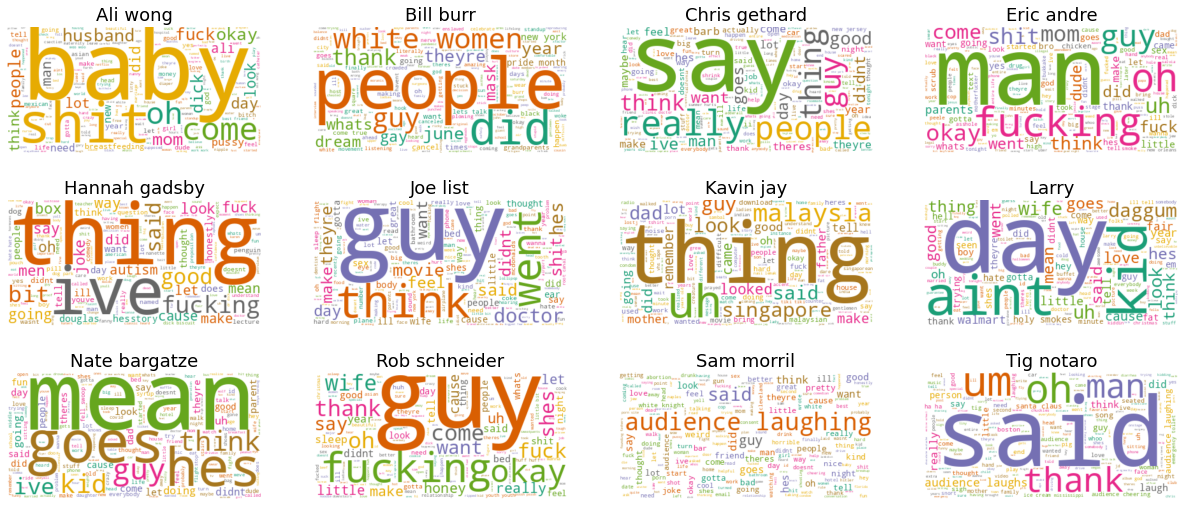

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [21, 9]

full_names = ['Ali wong', 'Bill burr', 'Chris gethard', 'Eric andre', 'Hannah gadsby', 'Joe list', 
             'Kavin jay', 'Larry', 'Nate bargatze', 'Rob schneider', 'Sam morril', 'Tig notaro']


# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)                          # 3 rows, 4 in each row
    plt.imshow(wc, interpolation="hamming")
    plt.axis("off")
    plt.title(full_names[index], fontsize=18)


plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband.
* Bill burr says a lot about people, like race (white) and sex (women, gay)
* Chris gethard says a lot about human, like guy, people, think
* Eric andre says f-word a lot, and some s-word, an also talk about about people (man, huy, mom, come)
* Hannah gadsby says f-word a lot, and share about her life a lot (ive, thing, say, said, make)
* Joe list says a lot about occupation (doctor, theyre) and his wife
* Kavin jay talks about nationalism (Malaysia, Singapore), and also his life (dad, guy, look)
* Larry talks about his family (kid, wife, house, love) and his life (Walmart, smokes, house, doctor)
* Nate bargatze talks a lot about her family (dad, kid, parent)
* Rob schneider says a lot f-word, and people (wife, guy, honey, shes, relationship) and life (bed, sleep)
* Sam morril has a more average frequency in her speeches, maybe she has a wide range of topic
* Tig notaro shares a lot happiness (thank, audience, laughing, cheers, santa, love)

## 2) Number of Words

### Analysis

In [10]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Bill burr,295
11,Tig notaro,769
9,Rob schneider,782
6,Kavin jay,876
8,Nate bargatze,1189
10,Sam morril,1349
5,Joe list,1365
3,Eric andre,1383
0,Ali wong,1448
4,Hannah gadsby,1517


In [11]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [64, 5, 89, 51, 72, 56, 53, 67, 60, 44, 47, 55]


'''
Ali Wong: https://www.imdb.com/title/tt7410684/
Bill burr: https://www.hollywoodreporter.com/tv/tv-news/bill-burrs-controversial-saturday-night-live-monologue-draws-mixed-reactions-4075205/
Chris gethard: https://www.imdb.com/title/tt6794460/
Eric Andre: https://www.imdb.com/title/tt12327104/
Hannah Gadsby: https://www.imdb.com/title/tt10332256/
Joe List: https://www.imdb.com/title/tt12837478/
Kavin Jay: https://www.imdb.com/title/tt7924764/
Larry the Cable Guy: https://www.imdb.com/title/tt11464488/
Nate Bargatze: https://www.imdb.com/title/tt14078164/
Rob Schneider: https://www.imdb.com/title/tt12724632/
Sam Morril: https://www.imdb.com/title/tt11798038/
Tig Notaro: https://www.imdb.com/title/tt4920096/
'''


# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
11,Tig notaro,769,2139,55,38.890909
0,Ali wong,1448,2878,64,44.968750
9,Rob schneider,782,2592,44,58.909091
6,Kavin jay,876,3139,53,59.226415
3,Eric andre,1383,3229,51,63.313725
4,Hannah gadsby,1517,4691,72,65.152778
7,Larry,1587,4556,67,68.000000
2,Chris gethard,1838,6294,89,70.719101
8,Nate bargatze,1189,4704,60,78.400000
5,Joe list,1365,4683,56,83.625000


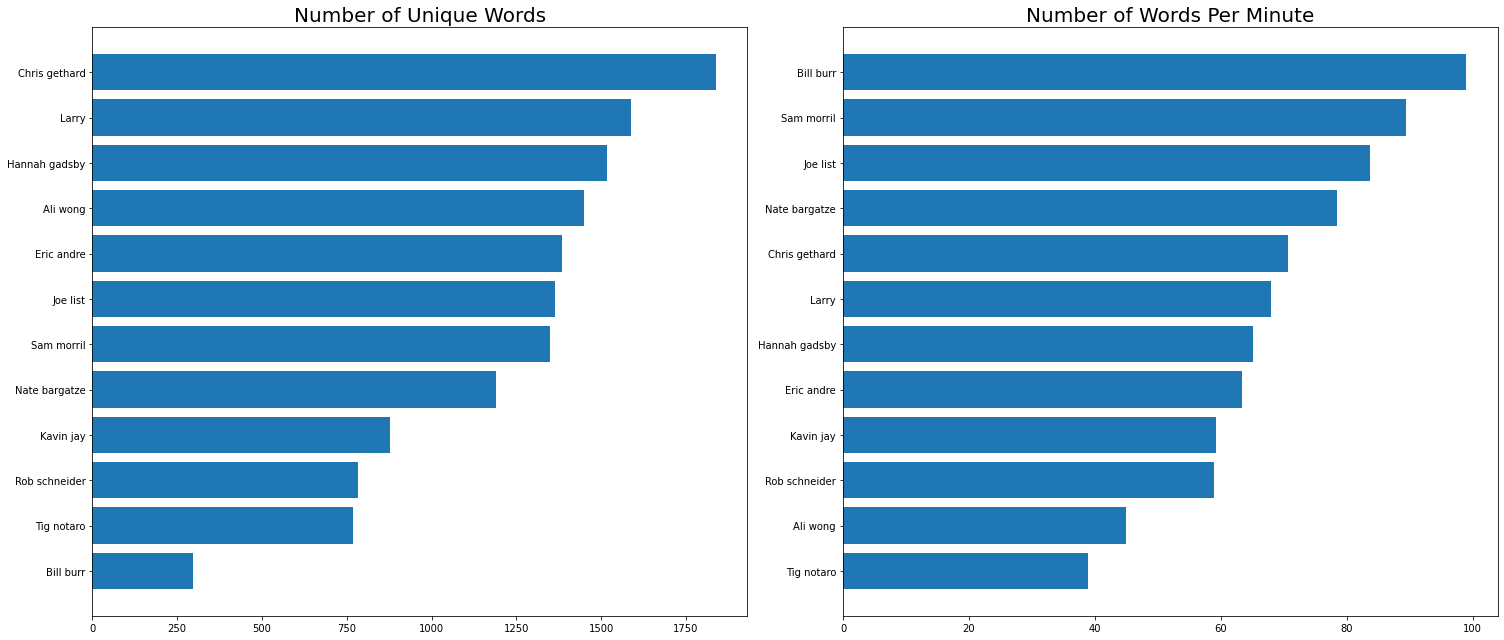

In [12]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Chris gethard (podcast host) and Larry the Cable Guy (TV host) use a lot of words in their comedy
   * Rob schneider (American director) and STig natora (deadpan comedy) have a smaller vocabulary
   * Bill burr (podcast host) has the smallest vocabulary, but it is fair if we consider he has only 5 minutes on the Saturday night live


* **Talking Speed**
   * Bill Burr (podcast host) and Tig natora (deadpan comedy) talk fast
   * Ali Wong (American actress) and Sam morril (American director) talk slow
   
Compare to other commedians, Ali Wong use relatively lots new vocabulary but has a relative slow speed, maybe she is good at controlling atmosphere and bring out a lot of new topics

## 3) Amount of Profanity

### Analysis

In [13]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('dont', 12),
 ('know', 12),
 ('thats', 12),
 ('right', 12),
 ('just', 11),
 ('im', 11),
 ('got', 10),
 ('time', 10),
 ('youre', 10),
 ('gonna', 9),
 ('yeah', 8),
 ('oh', 7),
 ('did', 7),
 ('think', 7),
 ('people', 6),
 ('good', 6),
 ('said', 6),
 ('cause', 6),
 ('man', 5),
 ('guys', 5),
 ('hes', 5),
 ('guy', 5),
 ('uh', 5),
 ('come', 4),
 ('fuck', 4),
 ('theyre', 4),
 ('thank', 4),
 ('say', 4),
 ('thing', 4),
 ('want', 4),
 ('going', 4),
 ('didnt', 4),
 ('goes', 4),
 ('little', 4),
 ('shit', 3),
 ('okay', 3),
 ('day', 3),
 ('look', 3),
 ('years', 3),
 ('really', 3),
 ('ive', 3),
 ('fucking', 3),
 ('went', 3),
 ('mom', 2),
 ('lot', 2),
 ('white', 2),
 ('whats', 2),
 ('new', 2),
 ('theres', 2),
 ('parents', 2),
 ('way', 2),
 ('shes', 2),
 ('make', 2),
 ('tell', 2),
 ('ill', 2),
 ('mean', 2),
 ('audience', 2),
 ('laughing', 2),
 ('baby', 1),
 ('husband', 1),
 ('ali', 1),
 ('pussy', 1),
 ('dick', 1),
 ('work', 1),
 ('women', 1),
 ('june', 1),
 ('month', 1),
 ('york', 1),
 

In [14]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,19,27
bill,0,0
chris,12,8
eric,52,23
hannah,66,8
joe,13,26
kavin,15,1
larry,0,1
nate,0,0
rob,48,13


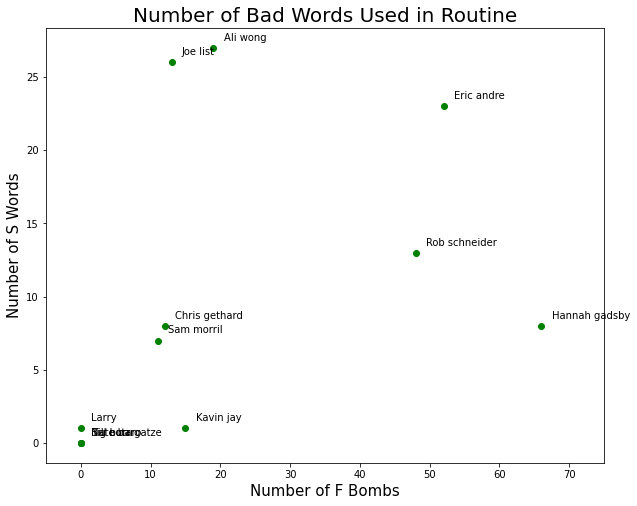

In [15]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='green')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 75) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **3 Clusters** We can see there are mainly 3 clusters, cluster 1 (less foul language group), cluster 2 (less f_words but high s_words), cluster 3 (high in both f-words and s_words)

* **Ali Wong has the highest s_words among all comedians, maybe her selling point is using tons of s_words**